In [2]:
from math import *
from numpy import *
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib notebook
import scipy
import scipy.optimize
from scipy.optimize import fsolve
atm=1.01325E5
torr=atm/760.0
R=8.3145
g=9.807
NA=6.022e23
def tok(x): return x+273.15
cal=4.184
kcal=1000*cal
e0=1.6021765e-19
F=NA*e0
eps0=8.854188e-12
epsw=78.54

446.2142715 2.702902382263196 -359.65607377177184
2.754543618072241 0.5053090316563867 3.2598526497286278 kPa 0.15500977680646152
7.38905609893065


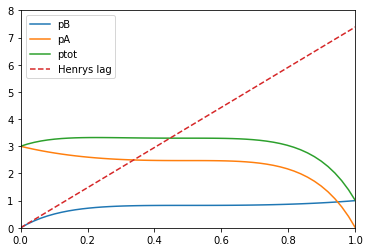

In [2]:
#Exempel Ö1
#Vid 25 gC bildar A och B en regulär lösning med chi=2. Ångtrycken över de rena ämnena är 3 kPa och 1 kPa.
#a) Beräkna Gibbs blandningsenergi för 1 mol lösning med xB=0.1.
#b) Beräkna totala ångtrycket och ångans sammansättning över denna lösning.
#c) Beräkna Henrys konstant för B löst i A.

chi=2
pAs=3
pBs=1
xB=0.1
xA=1-xB
n=1
T=tok(25)
DU=n*R*T*chi*xA*xB
DS=-n*R*(xA*log(xA)+xB*log(xB))
F=DU-T*DS
print(DU,DS,F)

pA=pAs*xA*exp(chi*xB**2)
pB=pBs*xB*exp(chi*xA**2)
print(pA,pB,pA+pB,'kPa',pB/(pA+pB))

kH=pBs*exp(chi)
print(kH)

xB=linspace(0,1)
plt.xlim(0,1)
plt.ylim(0,8)
plt.plot(xB,pBs*xB*exp(chi*(1-xB)**2),label='pB')
plt.plot(xB,pAs*(1-xB)*exp(chi*xB**2),label='pA')
plt.plot(xB,pBs*xB*exp(chi*(1-xB)**2)+pAs*(1-xB)*exp(chi*xB**2),label='ptot')
plt.plot(xB,kH*xB,linestyle='dashed',label='Henrys lag')
_=plt.legend()

In [9]:
#Exempel Ö2
#Ett ämne B bildar en regulär lösning med vatten, där  chi=7.3
#a) Vad är lösligheten för B i vatten uttryckt i M?
#b) Vad blir aktivitetsfaktorn för en mättad vattenlösning av B, inom var och en av följande konventioner:
#  - standardtillståndet är rent ämne (solvent convention)
#  - standardtillståndet är idealt utspädd lösning och molbråk används (solute convention)

chi=7.3
T=tok(25)
pBs=0.2 #bar

#Sätt 1: Via Henrys konstant
kH=pBs*exp(chi)
xmax=pBs/kH

#Sätt 2: Via Dmu0 för BiB -> BiW  (KBw = xmax)
Dmu0=R*T*chi
KBw=exp(-Dmu0/R/T)

#Sätt 3: Via uttrycket för kemisk potential: mu=mu* + RT(ln x+chi(1-x)^2)
xmax=exp(-chi)

cmax=xmax*55

print(kH,xmax,KBw,cmax)
x=0.01/55
x=xmax
gamma0=exp(chi*x*(x-2))
gamma1=exp(chi*(1-x)**2)
print(gamma0,gamma1)

296.059985516909 0.0006755387751938444 0.0006755387751938444 0.03715463263566144
0.9901889111204734 1465.776573426655


258.58440074568523
0.6 0.3443155332594437 0.6556844667405564
0.21778588058327203 0.1788375806089664
0.6 0.6


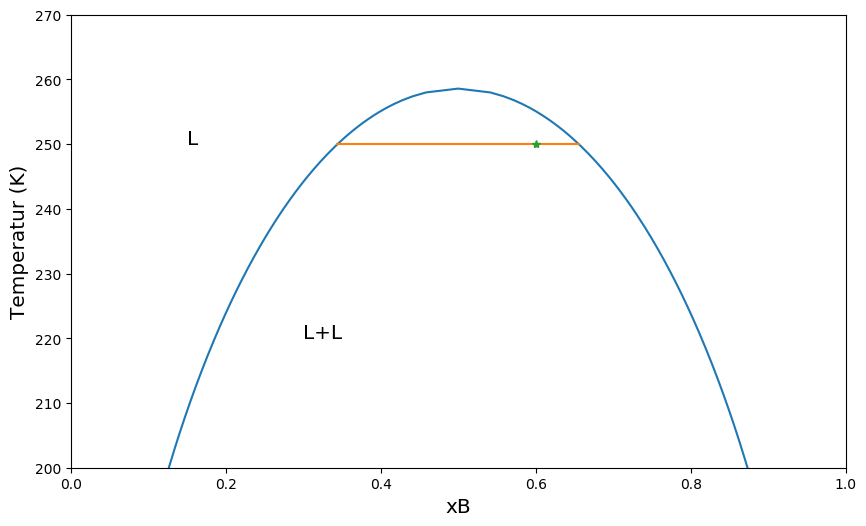

In [24]:
# Exempel Ö3
#A och B bildar regulär lösning med zw=4.3 kJ/mol, oberoende av temperaturen.
#a) Beräkna den kritiska temperaturen för att ha två vätskefaser.
#b) Vi blandar 2 mol A och 3 mol B och kyler lösningen till 250 K. Beskriv systemet.

zw=4.3e3
Tc=zw/(2*R)
print(Tc)

#b)
nA=2
nB=3
T=250
chi=zw/R/T
x1,=fsolve(lambda x: log(x/(1-x))+chi*(1-2*x), 0.01)
x2=1-x1
x0=nB/(nA+nB)
print(x0,x1,x2)
n1n2=(x2-x0)/(x0-x1)   #kvoten n1/n2
partn1=n1n2/(n1n2+1)   #andelen n1
print(n1n2,partn1)
x0check=partn1*x1+(1-partn1)*x2   #Dubbelkolla så att totalsammansättningen är rätt
print(x0,x0check)

#Rita fasdiagrammet för att illustrera situationen i uppgift b.
temp=[]
comp=[]
comp2=[]
for TT in linspace(200,Tc,100):
    xx,=fsolve(lambda x: log(x/(1-x))+zw/R/TT*(1-2*x), 0.01)
    comp.append(xx)
    comp2.append(1-xx) #andra lösningen
    temp.append(TT)
comp+=reversed(comp2) #lägg till den andra lösningen men så att punkterna ordnas stigande
temp+=reversed(temp)

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 100
plt.xlim(0,1)
plt.ylim(200,270)
plt.plot(comp,temp)
plt.text(0.15,250,'L',fontsize='x-large')
plt.text(0.3,220,'L+L',fontsize='x-large')
plt.plot([x1,x2],[T,T])
plt.plot(x0,T,'*')
plt.xlabel('xB', fontsize='x-large')
plt.ylabel('Temperatur (K)', fontsize='x-large')
plt.show()

In [12]:
# Exempel Ö7
#Beräkna arbetet för att flytta en natriumjon från "oändligheten" till en punkt 5 Å från ytan av en 
#sfär med radien 10 Å och laddningen +5e i följande två fall:
#a) rent vatten
#b) en saltlösning med Debye-längden 15 Å

Q=5*e0     #sfärens laddning
q=e0       #natriumjonens laddning
r=15e-10   #avståndet är 15 Å från centrum av sfären
a=10e-10   #radien

#a)
Psi=Q/(4*pi*eps0*epsw*r)
print(Psi,'V')
w=Psi*q
print(w,'J')
#b)
L=15e-10
Psia=Q/(4*pi*eps0*epsw*a*(1+a/L))
Psi=Psia*a/r*exp(-(r-a)/L)
print(Psia,Psi,'V')
w=Psi*q
print(w, 'J')




0.06111384419679448 V
9.791516499676549e-21 J
0.055002459777115015 0.0262739897259189 V
4.20955689001087e-21 J
